In [3]:
%pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [8]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [9]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [10]:
prep_df = pd.read_csv('UBQT_bind_raw.csv')
prep_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,inactive,41839.8
1,CHEMBL274438,CCCC(=O)NCCc1c2n(c3ccc(OC)cc13)CCCc1ccccc1-2,intermediate,5910.0
2,CHEMBL15192,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,intermediate,8348.1
3,CHEMBL60718,Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1,inactive,46945.0
4,CHEMBL267014,Clc1ccc(N2CCN(Cc3c[nH]c4ncccc34)CC2)cc1,inactive,41839.8
...,...,...,...,...
22240,CHEMBL4777381,Nc1nc2cc(C3CCNCC3)ccn2c1-c1ccc(O)cc1,inactive,100000.0
22241,CHEMBL5172138,O=C1c2ccccc2C(=O)c2oc(-c3cccnc3)nc21,active,990.0
22242,CHEMBL5196686,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,1900.0
22243,CHEMBL5173239,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,2100.0


CALCULATING THE LIPINSKI DESCRIPTORS OF THE MOLECULES

In [11]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [12]:
df_lipinski = lipinski(prep_df.canonical_smiles)

In [13]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,472.094,8.01030,1.0,3.0
1,376.500,4.72190,1.0,3.0
2,242.274,2.75210,0.0,3.0
3,351.855,2.69252,1.0,3.0
4,326.831,3.53850,1.0,3.0
...,...,...,...,...
22240,308.385,2.75610,3.0,5.0
22241,276.251,2.51200,0.0,5.0
22242,408.841,3.85330,0.0,6.0
22243,426.831,3.99240,0.0,6.0


In [14]:
df_combined = pd.concat([prep_df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,inactive,41839.8,472.094,8.01030,1.0,3.0
1,CHEMBL274438,CCCC(=O)NCCc1c2n(c3ccc(OC)cc13)CCCc1ccccc1-2,intermediate,5910.0,376.500,4.72190,1.0,3.0
2,CHEMBL15192,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,intermediate,8348.1,242.274,2.75210,0.0,3.0
3,CHEMBL60718,Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1,inactive,46945.0,351.855,2.69252,1.0,3.0
4,CHEMBL267014,Clc1ccc(N2CCN(Cc3c[nH]c4ncccc34)CC2)cc1,inactive,41839.8,326.831,3.53850,1.0,3.0
...,...,...,...,...,...,...,...,...
22240,CHEMBL4777381,Nc1nc2cc(C3CCNCC3)ccn2c1-c1ccc(O)cc1,inactive,100000.0,308.385,2.75610,3.0,5.0
22241,CHEMBL5172138,O=C1c2ccccc2C(=O)c2oc(-c3cccnc3)nc21,active,990.0,276.251,2.51200,0.0,5.0
22242,CHEMBL5196686,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,1900.0,408.841,3.85330,0.0,6.0
22243,CHEMBL5173239,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,2100.0,426.831,3.99240,0.0,6.0


In [15]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

In [16]:
df_combined.standard_value.describe()

count    2.224500e+04
mean     2.864069e+04
std      6.712246e+04
min      3.000000e-01
25%      5.011900e+03
50%      2.511890e+04
75%      3.981070e+04
max      4.466836e+06
Name: standard_value, dtype: float64

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,inactive,472.094,8.01030,1.0,3.0,41839.8
1,CHEMBL274438,CCCC(=O)NCCc1c2n(c3ccc(OC)cc13)CCCc1ccccc1-2,intermediate,376.500,4.72190,1.0,3.0,5910.0
2,CHEMBL15192,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,intermediate,242.274,2.75210,0.0,3.0,8348.1
3,CHEMBL60718,Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1,inactive,351.855,2.69252,1.0,3.0,46945.0
4,CHEMBL267014,Clc1ccc(N2CCN(Cc3c[nH]c4ncccc34)CC2)cc1,inactive,326.831,3.53850,1.0,3.0,41839.8
...,...,...,...,...,...,...,...,...
22240,CHEMBL4777381,Nc1nc2cc(C3CCNCC3)ccn2c1-c1ccc(O)cc1,inactive,308.385,2.75610,3.0,5.0,100000.0
22241,CHEMBL5172138,O=C1c2ccccc2C(=O)c2oc(-c3cccnc3)nc21,active,276.251,2.51200,0.0,5.0,990.0
22242,CHEMBL5196686,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,408.841,3.85330,0.0,6.0,1900.0
22243,CHEMBL5173239,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,426.831,3.99240,0.0,6.0,2100.0


In [19]:
df_norm.standard_value_norm.describe()

count    2.224500e+04
mean     2.864069e+04
std      6.712246e+04
min      3.000000e-01
25%      5.011900e+03
50%      2.511890e+04
75%      3.981070e+04
max      4.466836e+06
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,inactive,472.094,8.01030,1.0,3.0,4.378410
1,CHEMBL274438,CCCC(=O)NCCc1c2n(c3ccc(OC)cc13)CCCc1ccccc1-2,intermediate,376.500,4.72190,1.0,3.0,5.228413
2,CHEMBL15192,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,intermediate,242.274,2.75210,0.0,3.0,5.078412
3,CHEMBL60718,Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1,inactive,351.855,2.69252,1.0,3.0,4.328411
4,CHEMBL267014,Clc1ccc(N2CCN(Cc3c[nH]c4ncccc34)CC2)cc1,inactive,326.831,3.53850,1.0,3.0,4.378410
...,...,...,...,...,...,...,...,...
22240,CHEMBL4777381,Nc1nc2cc(C3CCNCC3)ccn2c1-c1ccc(O)cc1,inactive,308.385,2.75610,3.0,5.0,4.000000
22241,CHEMBL5172138,O=C1c2ccccc2C(=O)c2oc(-c3cccnc3)nc21,active,276.251,2.51200,0.0,5.0,6.004365
22242,CHEMBL5196686,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,408.841,3.85330,0.0,6.0,5.721246
22243,CHEMBL5173239,CN1CC[C@@H](Oc2ccc(Cl)c(-c3nc4c(o3)C(=O)c3cccc...,intermediate,426.831,3.99240,0.0,6.0,5.677781


In [21]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,inactive,472.094,8.01030,1.0,3.0,4.378410
3,CHEMBL60718,Cc1ccc(S(=O)(=O)N[C@@H](Cc2ccccc2)C(=O)CCl)cc1,inactive,351.855,2.69252,1.0,3.0,4.328411
4,CHEMBL267014,Clc1ccc(N2CCN(Cc3c[nH]c4ncccc34)CC2)cc1,inactive,326.831,3.53850,1.0,3.0,4.378410
5,CHEMBL34241,CC(=O)c1c(O)c(C)c(O)c(Cc2c(O)c3c(c(C(=O)/C=C/c...,inactive,516.546,5.39672,5.0,8.0,4.378410
6,CHEMBL1475137,CCCc1c(OCCCOc2ccc(OCC(=O)O)cc2)ccc(CC=O)c1O,inactive,402.443,3.39740,2.0,6.0,4.228410
...,...,...,...,...,...,...,...,...
22237,CHEMBL4743789,Cc1ccc2nc(N)c(-c3ccc(O)cc3)n2c1,inactive,239.278,2.59752,2.0,4.0,4.000000
22238,CHEMBL4781213,Cc1ccn2c(-c3ccc(O)cc3)c(N)nc2c1,inactive,239.278,2.59752,2.0,4.0,4.000000
22239,CHEMBL4742897,Cc1cccn2c(-c3ccc(O)cc3)c(N)nc12,inactive,239.278,2.59752,2.0,4.0,4.000000
22240,CHEMBL4777381,Nc1nc2cc(C3CCNCC3)ccn2c1-c1ccc(O)cc1,inactive,308.385,2.75610,3.0,5.0,4.000000


In [22]:
df_2class.to_csv('UBQTN_processed_allBioactivity.csv', index=False)

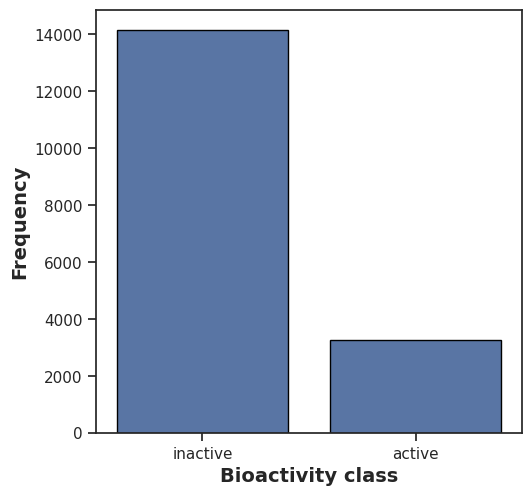

In [23]:
#set figure sizes
plt.figure(figsize=(5.5, 5.5))

#set plot labels
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

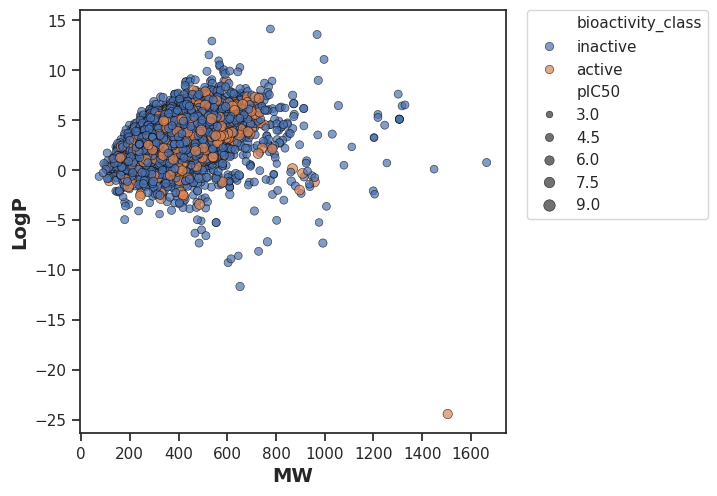

In [24]:
#set figure size
plt.figure(figsize=(5.5, 5.5))

#scatterplot labels and alpha transparency
sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [33]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,25661194.0,2.636297e-23,0.05,Different distribution (reject H0)


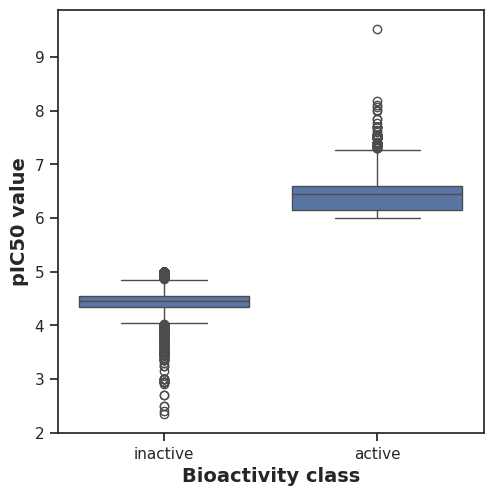

In [25]:
#set plot size
plt.figure(figsize=(5.5, 5.5))

#set plot labels
sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

STATISTICAL TESTS

In [26]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [27]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,46172499.0,0.0,0.05,Different distribution (reject H0)


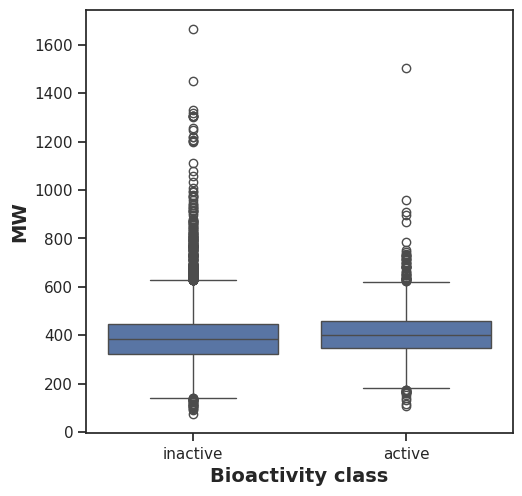

In [28]:
#set size
plt.figure(figsize=(5.5, 5.5))

#plot labels
sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

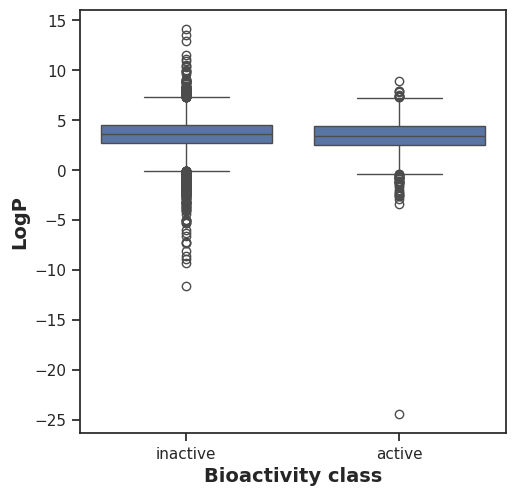

In [29]:
#set size
plt.figure(figsize=(5.5, 5.5))

#plot labels
sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [30]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,21695842.0,7.857456e-08,0.05,Different distribution (reject H0)


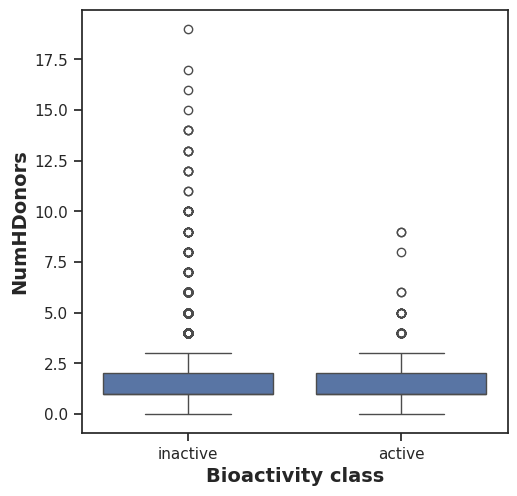

In [31]:
#set size
plt.figure(figsize=(5.5, 5.5))

#plot label
sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [32]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,22686393.5,0.100868,0.05,Same distribution (fail to reject H0)


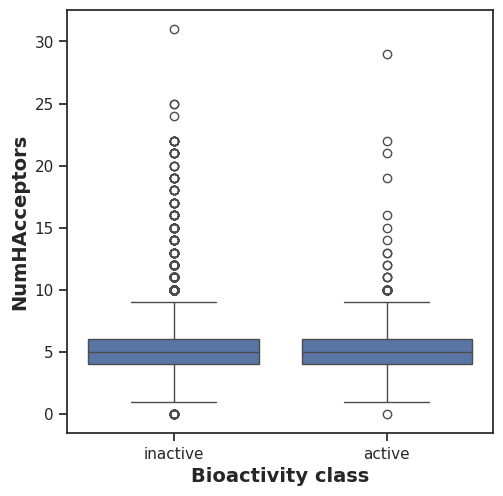

In [34]:
#set size
plt.figure(figsize=(5.5, 5.5))

#plot labels
sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [35]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,24467588.5,6.365452e-08,0.05,Different distribution (reject H0)
